In [47]:
import pandas as pd
import numpy as np

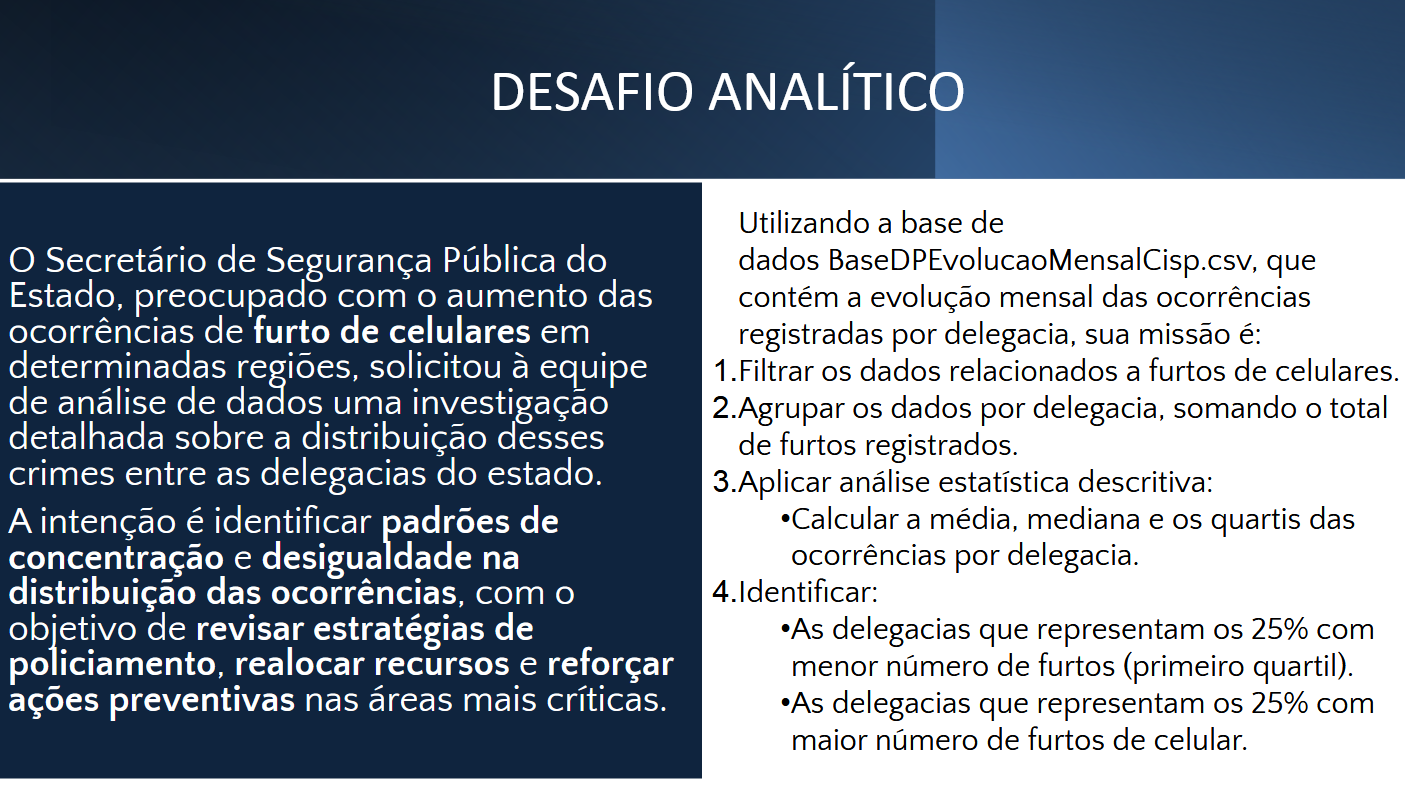

In [48]:
#importando dados
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep=';')
df.head()

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3


In [49]:
#reconhecendo colunas
df.columns

Index(['cisp', 'mes', 'ano', 'mes_ano', 'aisp', 'risp', 'munic', 'mcirc',
       'regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas'

In [50]:
#Filtrando por furtos e transformando em float
df_furto = df.groupby('cisp')['furto_celular'].sum().reset_index()
df_furto['furto_celular'] = df_furto['furto_celular'].astype(float)

In [51]:
#Aplicando analise estatistica descritiva
array_furto_celular = np.array(df_furto['furto_celular'])

In [52]:
#Pegando medidas
media = np.mean(array_furto_celular)
mediana = np.median(array_furto_celular)
distancia = (media-mediana) / mediana
q1 = np.quantile(array_furto_celular, 0.25)
q2 = np.quantile(array_furto_celular, 0.5)
q3 = np.quantile(array_furto_celular, 0.75)


In [53]:
print(f'A média é {media}')
print(f'A mediana é {mediana}')
print(f'A distância é {distancia}')
print(f'Primeiro quartil (Q1): {q1}')
print(f'Segundo quartil (Q2, Mediana): {q2}')
print(f'Terceiro quartil (Q3): {q3}')

A média é 3338.1159420289855
A mediana é 1633.5
A distância é 1.0435359302289473
Primeiro quartil (Q1): 449.0
Segundo quartil (Q2, Mediana): 1633.5
Terceiro quartil (Q3): 4498.25


In [54]:
#Calculando os percentis
df_furto_menor_q1 = df_furto.loc[df_furto['furto_celular'] < q1]
df_furto_maior_q3 = df_furto.loc[df_furto['furto_celular'] > q3]
df_furto_menor_q1


,cisp,furto_celular
7,11,385.0
41,45,73.0
60,67,364.0
61,70,201.0
77,92,63.0
79,94,361.0
82,97,227.0
83,98,90.0
84,99,431.0
85,100,387.0


In [55]:
df_furto_maior_q3

,cisp,furto_celular
0,1,14968.0
1,4,13318.0
2,5,23117.0
3,6,6220.0
5,9,14159.0
6,10,14105.0
8,12,16008.0
9,13,7188.0
10,14,16945.0
11,15,6784.0


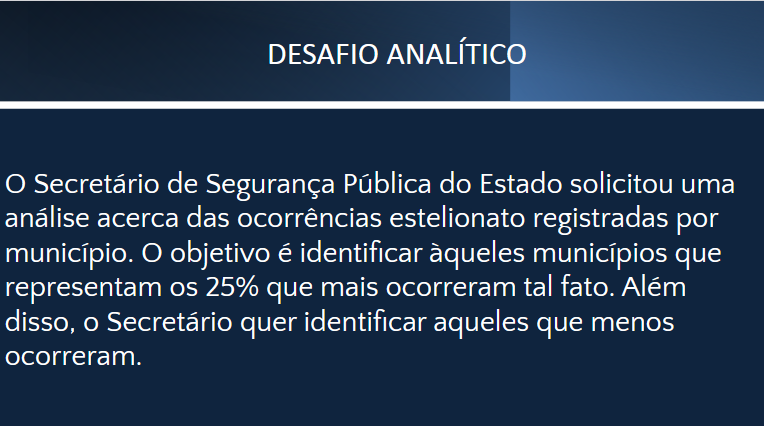

In [56]:
#Filtrando DF por estelionato
df_estelionato = df.loc[(df['estelionato'])]
df_estelionato

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
69,91,1,2003,2003m01,10,5,Valença,3306107,Interior,0,...,NaN,NaN,28,2,1,0,0,0,177,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
37,44,1,2003,2003m01,3,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,18,1,0,0,0,0,464,3
8,13,1,2003,2003m01,19,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,26,1,0,0,0,0,455,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,30,1,2003,2003m01,9,2,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,90,2,4,0,0,0,577,3
32,37,1,2003,2003m01,17,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,84,7,9,0,0,0,745,3
134,13,2,2003,2003m02,19,1,Rio de Janeiro,3304557,Capital,1,...,NaN,NaN,28,2,1,0,0,0,387,3
27,32,1,2003,2003m01,18,2,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,181,9,3,0,0,0,830,3


In [57]:
#Convertendo valores para float
df_estelionato['estelionato'] = df_estelionato['estelionato'].astype(float)

In [58]:
#Agrupando estelionato por municipio
estelionato_munic = df.groupby('munic')['estelionato'].sum().reset_index()
estelionato_munic = estelionato_munic.sort_values(by='estelionato', ascending=False)
estelionato_munic

,munic,estelionato
68,Rio de Janeiro,606042
48,Niterói,50603
23,Duque de Caxias,41281
78,São Gonçalo,37222
50,Nova Iguaçu,36742
...,...,...
35,Laje do Muriaé,173
83,São Sebastião do Alto,138
61,Queimados;Japeri,50
57,Piraí;Pinheiral,8


In [59]:
array_estelionato = np.array(estelionato_munic['estelionato'])

In [60]:
#Fazendo medidas discritivas
media_estelionato = np.mean(array_estelionato)
mediana_estelionato = np.median(array_estelionato)
distancia_estelionato = (media_estelionato-mediana_estelionato) / mediana_estelionato
q1_estelionato = np.quantile(array_estelionato, 0.25)
q2_estelionato = np.quantile(array_estelionato, 0.50)
q3_estelionato = np.quantile(array_estelionato, 0.75)

In [61]:
print(f'A média é {media_estelionato}')
print(f'A mediana é {mediana_estelionato}')
print(f'A distância é {distancia_estelionato}')
print(f'Primeiro quartil (Q1): {q1_estelionato}')
print(f'Segundo quartil (Q2, Mediana): {q2_estelionato}')
print(f'Terceiro quartil (Q3): {q3_estelionato}')

A média é 12167.655555555555
A mediana é 1472.0
A distância é 7.266070350241546
Primeiro quartil (Q1): 639.5
Segundo quartil (Q2, Mediana): 1472.0
Terceiro quartil (Q3): 7197.5


In [62]:
#Encontrando municipio com mais estelionato
munic_mais_estelionato = estelionato_munic.loc[estelionato_munic['estelionato'] > q3_estelionato]
munic_mais_estelionato

,munic,estelionato
68,Rio de Janeiro,606042
48,Niterói,50603
23,Duque de Caxias,41281
78,São Gonçalo,37222
50,Nova Iguaçu,36742
81,São João de Meriti,23172
13,Campos dos Goytacazes,22142
54,Petrópolis,17251
36,Macaé,16577
89,Volta Redonda,16050


In [63]:
#Encontrando municipio com menos estelionato
munic_menos_estelionato = estelionato_munic.loc[estelionato_munic['estelionato'] < q1_estelionato]
munic_menos_estelionato

,munic,estelionato
17,Carmo,637
39,Magé;Guapimirim,624
20,Conceição de Macabú,622
74,Silva Jardim,621
46,Natividade;Varre-Sai,547
58,Porciúncula,517
71,Sapucaia,517
79,São José do Vale do Rio Preto,468
65,Rio Claro,462
16,Cardoso Moreira;Italva,443


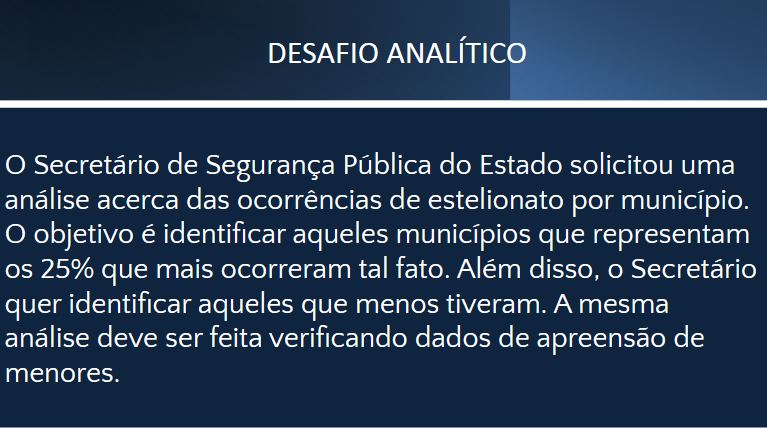

In [64]:
apreensao_munic = df.groupby('munic')['aaapai'].sum().reset_index()
apreensao_munic = apreensao_munic.sort_values(by='aaapai', ascending=True)
apreensao_munic

,munic,aaapai
14,Campos dos Goytacazes;São Francisco de Itabapoana,0.0
57,Piraí;Pinheiral,0.0
61,Queimados;Japeri,0.0
66,Rio das Flores,12.0
75,Sumidouro,13.0
...,...,...
48,Niterói,5316.0
13,Campos dos Goytacazes,5468.0
23,Duque de Caxias,6244.0
78,São Gonçalo,7176.0


In [67]:
array_apreesao = np.array(estelionato_munic['aaapai'])

KeyError: 'aaapai'

In [ ]:
#Fazendo medidas discritivas
media_apreesao = np.mean(array_apreesao)
mediana_apreesao = np.median(array_apreesao)
distancia_apreesao = (media_apreesao-mediana_apreesao) / mediana_apreesao
q1_apreesao = np.quantile(array_apreesao, 0.25)
q2_apreesao = np.quantile(array_apreesao, 0.50)
q3_apreesao = np.quantile(array_apreesao, 0.75)